In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [3]:
subdf = pd.read_csv("dataset/sample_submission.csv")
testdf = pd.read_csv("dataset/test.csv")
traindf = pd.read_csv("dataset/train.csv")


# Analysing Tables

In [4]:
print(subdf.head())
print("\n")
print(subdf.dtypes)
print("\n")


   PRODUCT_ID  PRODUCT_LENGTH
0      604373      701.093794
1     1729783      734.506163
2     1871949      741.360258
3     1107571      730.327767
4      624253      666.847946


PRODUCT_ID          int64
PRODUCT_LENGTH    float64
dtype: object




In [5]:
print(traindf.head())
print("\n")
print(traindf.dtypes)

   PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN             1650   
1                                                NaN             2755   
2  Specifications: Color: Red, Mate

In [6]:
testdf.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [10]:
print(traindf['BULLET_POINTS'][5])

[Simple and elegant, great for displaying indoor plants like succulent plants, air plants, seedling, herbs etc.,High Quality - Both Indoor/outdoor planter stand and flower pots are made of wrought iron material, with powder coated paint, rustproof and durable.,Pefect decor for living room, balcony and garden.,BEST QUALITY, STRONG AND DURABLE - The surface of the pot holder is rust-proofed and it can be used for a longer time.,The elevated indoor potted plant stand can make watering easier and give the plant a better space to grow.,A pragmatic and eco-friendly gift for any nature lover, gardening hobbyist or home decorist.,Note : Plants are only for display.These are not included with Planter,Please allow 0~2cm errors due to manual measurement.]


In [13]:
print(traindf['DESCRIPTION'][7])

<p><strong>Aluminum Foil Stickers-good kitchen helper for mom and wife.&nbsp;</strong><br><br><strong>Specification: &nbsp;</strong><br><strong>-Materials: high-quality PVC &nbsp;</strong><br><strong>-Size: 2 MT&nbsp;</strong><br><strong>-Color: Silver &nbsp;</strong><br><strong>-Friendly note: Please buy enough rolls at a time to make sure that these wallpaper comes from the same batch to avoid color difference. &nbsp;</strong><br><strong>-This Aluminum Foil Stickers can be used for any dry, clean and smooth surface.&nbsp;</strong><br><br><strong>Features: &nbsp;</strong><br><strong>1.High temperature resistant material is suitable for kitchen, which resists temperatures up to 250 Celsius. It can be used for a long time and will not deform. &nbsp;</strong><br><strong>2.Easily to cut up: A grid line in square on the back, easy for you get the size you need when you cut.&nbsp;</strong><br><br><strong>How to use? &nbsp;</strong><br><strong>1.Before sticking the kitchen oil proof wallpape

# Plots to check the correlation

In [13]:
# calculate correlation coefficient between the two columns
corr = traindf['PRODUCT_TYPE_ID'].corr(traindf['PRODUCT_LENGTH'])
print(corr)

0.0009609601257185689


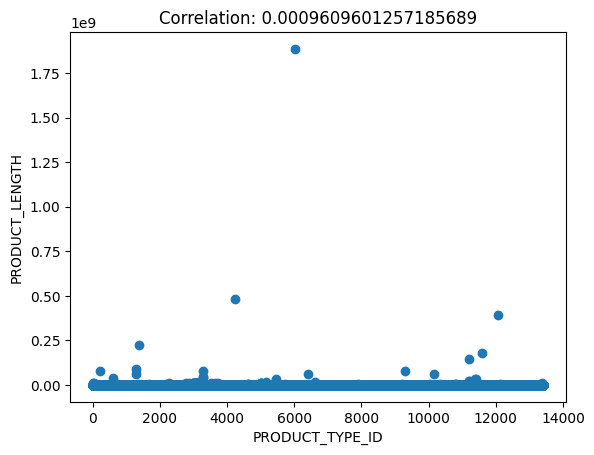

In [14]:
# plot a scatter plot with correlation coefficient as title
plt.scatter(traindf['PRODUCT_TYPE_ID'], traindf['PRODUCT_LENGTH'])
plt.title('Correlation: ' + str(corr))
plt.xlabel('PRODUCT_TYPE_ID')
plt.ylabel('PRODUCT_LENGTH')
plt.show()

# Implementing Linear Refression using Keras

In [22]:
# select 20000 random rows
train_df_sample = traindf.sample(n=20000, random_state=42)

In [23]:
x = train_df_sample['PRODUCT_TYPE_ID'].values
y = train_df_sample['PRODUCT_LENGTH'].values

In [24]:
# create the model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [25]:
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
# fit the model to the data
model.fit(x, y, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
20000/20000 [==============================] - 60s 3ms/step - loss: 10896971776.0000
Epoch 2/50
20000/20000 [==============================] - 59s 3ms/step - loss: 10896660480.0000
Epoch 3/50
20000/20000 [==============================] - 62s 3ms/step - loss: 10896700416.0000
Epoch 4/50
20000/20000 [==============================] - 62s 3ms/step - loss: 10896800768.0000
Epoch 5/50
20000/20000 [==============================] - 59s 3ms/step - loss: 10896945152.0000
Epoch 6/50
20000/20000 [==============================] - 59s 3ms/step - loss: 10897206272.0000
Epoch 7/50
20000/20000 [==============================] - 59s 3ms/step - loss: 10896405504.0000
Epoch 8/50
20000/20000 [==============================] - 59s 3ms/step - loss: 10896887808.0000
Epoch 9/50
20000/20000 [==============================] - 60s 3ms/step - loss: 10896766976.0000
Epoch 10/50
20000/20000 [==============================] - 59s 3ms/step - loss: 10896795648.0000
Epoch 11/50
20000/20000 [==============

In [27]:
# make predictions using the model
y_pred = model.predict(x)

625/625 [==============================] - 1s 2ms/step


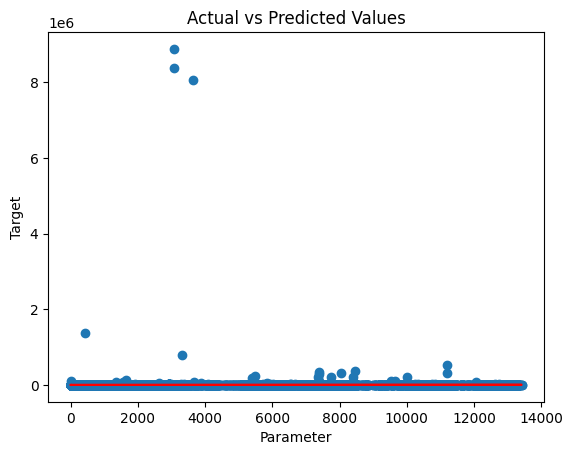

In [28]:
# plot actual vs predicted values
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Parameter')
plt.ylabel('Target')
plt.show()